# Spam Detection: Naive Bayes vs SVM

**Student Name:** Michael Lewellen  
**Date:** 2/26/2026

In this project, you'll:
1. Load a spam email dataset
2. Train a Naive Bayes classifier
3. Train an SVM classifier
4. Compare the results

<small><i>Note</i>: This project was created with the assistance of AI</small>

---

## Step 1: Import Libraries and Load Data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
# Set random seed for reproducibility
np.random.seed(42)

In [10]:
# Load the dataset
spam = pd.read_csv("../data/spam_data.csv")

# Display first few rows
print(spam.head())

   word_free  word_money  word_winner  word_click  word_urgent  \
0   0.116603    0.081405     0.248621    0.107026     0.084280   
1   0.150017    0.202468     0.071720    0.227412     0.228002   
2   0.009429    0.190923     0.094307    0.152571     0.272270   
3   0.085727    0.129830     0.205633    0.099737     0.016976   
4   0.050113    0.050286     0.011001    0.220921     0.199141   

   num_exclamation  num_dollar  num_capitals  email_length  has_link  is_spam  
0         0.162809    0.042277      0.240659    101.836546  0.296066        0  
1         0.093779    0.123205      0.062907     90.571442  0.193681        0  
2         0.074788    0.123115      0.226665    130.369345  0.023094        0  
3         0.112176    0.283335      0.192520     98.526674  0.189685        0  
4         0.142389    0.253251      0.241701     96.637459  0.260481        0  


## Step 2: Preprocessing the Data
* Clean the data
* Split the data into training and test sets.
* Feature Scaling

In [24]:
# First to find missing values
missing = spam.isna().sum()
print (missing)

# Check consistent dtypes
print(spam.dtypes)

# Check for duplicates
print(spam.duplicated().sum())

# Checking for possible outliers in the data
print (spam.describe())

# no outliers, no duplicates, no missing data, no weird data types... Data is about as clean as it gets

# Time to split
from sklearn.model_selection import train_test_split

X = spam.drop('is_spam', axis=1)
y = spam['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
print(f"Train is_spam split = {(y_train==1).sum()/y_train.count()}, Test is_spam split = {(y_test==1).sum()/y_test.count()}")

# and scale 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

word_free          0
word_money         0
word_winner        0
word_click         0
word_urgent        0
num_exclamation    0
num_dollar         0
num_capitals       0
email_length       0
has_link           0
is_spam            0
dtype: int64
word_free          float64
word_money         float64
word_winner        float64
word_click         float64
word_urgent        float64
num_exclamation    float64
num_dollar         float64
num_capitals       float64
email_length       float64
has_link           float64
is_spam              int64
dtype: object
0
         word_free   word_money  word_winner   word_click  word_urgent  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.324655     0.437897     0.444648     0.327555     0.448487   
std       0.276739     0.416377     0.429590     0.266253     0.429160   
min       0.001814     0.000009     0.000003     0.001728     0.000040   
25%       0.103749     0.130491     0.133985     0.123341     0.125848   

In [25]:
# Split the data using a random state of 42 for reproducibility
# Time to split
from sklearn.model_selection import train_test_split

X = spam.drop('is_spam', axis=1)
y = spam['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
print(f"Train is_spam split = {(y_train==1).sum()/y_train.count()}, Test is_spam split = {(y_test==1).sum()/y_test.count()}")

# and scale 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train is_spam split = 0.4, Test is_spam split = 0.4


## Step 3: Train Naive Bayes Classifier

In [38]:
# training Naive Bayes

from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(X_train_scaled, y_train)  # using scaled 'X_train' doesn't really matter for Naive Bayes
y_predict_NB = modelNB.predict(X_test_scaled)

Display your confusion matrix and your classification report.

In [39]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_predict_NB))
print(classification_report(y_test, y_predict_NB))

[[180   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       120

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Step 4: Train k-Nearest Neighbors Classifier

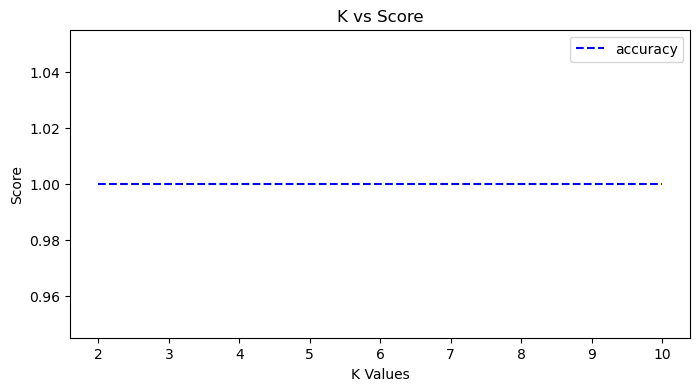

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# first to find an optimal 'k' value
optK = []
for k in range(2,11):
    modelKN = KNeighborsClassifier(n_neighbors=k)
    modelKN.fit(X_train_scaled,y_train)
    optK.append((k, modelKN.score(X_test_scaled, y_test)))

# plotting
k_values, scores = zip(*optK) 
plt.figure(figsize=(8,4))
plt.plot(k_values, scores, color='blue', linestyle = '--', label = 'accuracy')
plt.xlabel("K Values")
plt.ylabel("Score")
plt.title("K vs Score")
plt.legend()
plt.show()

# Clearly this data is too clean.... the straight line of perfect scores for every k value ... so we'll use k = 2



Display your confusion matrix and classification report.

In [40]:
modelKN = KNeighborsClassifier(n_neighbors = 2)
modelKN.fit(X_train_scaled, y_train)

y_predict_KN = modelKN.predict(X_test_scaled)
print(confusion_matrix(y_test, y_predict_KN))
print(classification_report(y_test, y_predict_KN))


[[180   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       120

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Step 5: Train SVM Classifier

In [ ]:
from sklearn.svm import SVC

# given what we've observed in the data up to this point, a high C value for unforgiving boundaries, and a lower gamma to control the reach 
# of each point seem like logical.  We'll begin with C = 10 , gamma = 0.01 and reserve the option to modify those
modelSVC = SVC(gamma=0.01, C=10, kernel='rbf')
modelSVC.fit(X_train_scaled, y_train)



[[180   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       120

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Display your confusion matrix and your classification report.

In [42]:
y_predict_SVC = modelSVC.predict(X_test_scaled)
print(confusion_matrix(y_test, y_predict_SVC))
print(classification_report(y_test,y_predict_SVC))

[[180   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       120

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Step 6: Compare the Models
* Create graphs that compare model results
* Make calculations to compare model results

Discuss the results of your comparison.

## Step 7: Answer Discussion Questions

Based on your results, answer the following questions:

### Question 1: Which model performed better overall? Why do you think so?

**Your Answer:**

_[Write your answer here]_

---

### Question 2: What is the difference between accuracy and precision? Which is more important for spam detection?

**Your Answer:**

_[Write your answer here]_

---

### Question 3: When would you choose Naive Bayes over kNN or SVM in a real-world application?

**Your Answer:**

_[Write your answer here]_

---

### Question 4: What are the key assumptions of Naive Bayes? Do you think they hold true for this spam detection problem?

**Your Answer:**

_[Write your answer here]_

---

### Question 5: How did you determine your value for $k$ in the kNN model?

**Your Answer:**

_[Write your answer here]_

---

## Summary

In this project, you:
- ✅ Loaded and split a spam detection dataset
- ✅ Trained a Naive Bayes classifier
- ✅ Trained an SVM classifier  
- ✅ Compared both models using multiple metrics
- ✅ Analyzed the results

**Key Takeaways:**
1. Different algorithms can produce different results on the same data
2. Multiple metrics (accuracy, precision, recall) give a complete picture
3. Both Naive Bayes and SVM are effective for classification tasks
4. The choice of algorithm depends on the specific requirements of your problem